In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load and process dataset
load breast_cancer.csv, drop columns "id" and "Unnamed: 32", investigate the dataset, and divide into train and test with 80/20 ratio, map values of "diagnosis" from ("B","M") to (0,1)

In [2]:
df = pd.read_csv("breast_cancer.csv")
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df[['diagnosis']] = df[['diagnosis']].apply(lambda col:pd.Categorical(col).codes)

In [3]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [5]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['diagnosis'])], df['diagnosis'], test_size=0.2, random_state=40)

In [6]:
xTrain.head()

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
47,534.6,24.25,759.4,0.12310,0.023360,0.4166,0.07340,0.012150,0.20880,0.12260,...,15.67,0.11580,0.006532,0.17860,0.2128,0.01743,0.3900,18.66,0.8937,27.95
483,571.1,20.64,686.5,0.07957,0.008186,0.1346,0.03160,0.009233,0.09077,0.04548,...,14.96,0.09950,0.003245,0.11990,0.1732,0.01285,0.2518,17.64,0.9462,23.53
269,344.9,20.74,410.4,0.12890,0.047850,0.2550,0.02867,0.017450,0.08600,0.08448,...,11.69,0.10820,0.008902,0.13350,0.1668,0.02728,0.2605,20.39,1.4890,25.21
243,590.0,39.93,706.0,0.06807,0.026670,0.1442,0.02344,0.010070,0.06106,0.04697,...,15.01,0.08043,0.004351,0.09368,0.1773,0.02598,0.2663,23.77,1.0570,26.34
221,561.3,21.03,686.6,0.11920,0.023140,0.2698,0.04451,0.008360,0.09090,0.07860,...,14.98,0.10510,0.005851,0.13760,0.1962,0.01842,0.3065,13.90,0.4981,17.13


In [7]:
yTrain.head()

47     1
483    0
269    0
243    0
221    0
Name: diagnosis, dtype: int8

## Implementing KMeans

In [8]:
class KMeans(object):
    def __init__(self, K, metric='L2', max_iter=200, eps=1e-4):
        self.K=K
        self.max_iter=max_iter
        self.eps=eps
        self.cluster_centers=np.array([])
        """
        TODO:
        if metric is 'L2' let self.dist be a function that computes euclidian distance between x and y vectors,
        if metric is 'L1' let self.dist be a function that computes manhattan distance between x and y vectors,
        otherwise raise not implemented error
        """
        
        if metric not in ['L1', 'L2']:
            raise NotImplementedError('Invalid metric')
            
        self.dist = self._eucidian_distance if metric == 'L2' else self._manhattan_distance
    
    def _eucidian_distance(self, x, y):
        return np.sqrt(np.sum((x - y)**2, axis=1))

    def _manhattan_distance(self, x, y):
        return np.sum(np.abs(x - y), axis=1)
        
        
    def distortion(self, X, r):
        """
        param X: numpy array of shape (M,N)
        param r: numpy array of shape (M), shows to which cluster each row of X belongs
        return: distortion value of the dataset
        """
        #TODO calculate distortion measure using X and self.cluster_centers
        
        res = 0
        for i in range(len(X)):
            dist = self.dist(X[i], self.cluster_centers[r[i]])
        
        
    def _init_centeroids_random(self, X):
        import random as rd
        df_size = X.shape[0]
        self.cluster_centers = self.cluster_centers.reshape(X.shape[1], 0)
        
        for i in range(self.K):
            rand = rd.randint(0, df_size - 1)
            self.cluster_centers = np.c_[self.cluster_centers, X[rand]] 
        
    def _init_centeroids_kmenaspp(self, X):
        import random as rd
        first_centroid_random_index = rd.randint(0,X.shape[0])
        self.cluster_centers = np.array([X[first_centroid_random_index]])
        for k in range(1, self.K):
            distances = np.array([]) 
            for x in X:
                distances = np.append(distances, np.min(np.sum((x-self.cluster_centers)**2)))
            prob = distances / np.sum(distances)
            cummulative_prob = np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            self.cluster_centers=np.append(self.cluster_centers,[X[i]],axis=0)
        
        
    def init_centroids(self, X, centers_init):
        """
        :param X: numpy array of shape (M,N)
        """
        """TODO: 
        If centers_init is 'random' initialize self.cluster_centers with random K items from X,
        if it is 'kmeans++' initialize centroids according to the algorithm in 
        http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf page 3,
        otherwise raise not implemented error .
        """
        
        if centers_init == 'random':
            self._init_centeroids_random(X)
        elif centers_init == 'kmeans++':
            self._init_centeroids_kmenaspp(X)
        else:
            raise NotImplementedError('Invalid method for param center_init')
            
        
    def fit(self, X, centers_init='random'):
        """
        :param X: numpy array of shape (M,N)
        """
        """TODO: 
        1. Initialize cluster centers using self.init_centroids method
        2. Implement KMeans algorithm and  terminate it when either self.max_iter iterations are performed,
        or the biggest change in cluster centers is smaller than self.eps
        
        The final cluster centers should be saved in self.cluster_centers
        """   
        from copy import deepcopy
        
        self.init_centroids(X, centers_init)

        for it in range(self.max_iter):
            distances = np.array([]).reshape(X.shape[0], 0)
        
            for k in range(self.K):
                temp_dist = self.dist(X, self.cluster_centers[:, k])**2
                distances = np.c_[distances, temp_dist] 
            r = np.argmin(distances, axis=1) 

            clusters = {}
            for k in range(self.K):
                clusters[k] = np.array([]).reshape(X.shape[1], 0)

            for i in range(X.shape[0]):
                clusters[r[i]] = np.c_[clusters[r[i]], X[i]]

            for k in range(self.K):
                clusters[k] = clusters[k].T

            for k in range(self.K):
                old_cluster_centers = deepcopy(self.cluster_centers)
                self.cluster_centers[:, k] = np.mean(clusters[k], axis=0)
            if np.max(np.sum(np.abs(old_cluster_centers - self.cluster_centers), axis=1)) < self.eps:
                break
                
    
    def predict(self, X):
        """
        :param X: numpy array of shape (M,N)
        :return: numpy array of shape (M,)
        """
        """TODO:
        using  self.cluster_centers predict to which cluster each datapoint of X belongs, values in returned array
        are integers(id of the cluster). 
        """
        
        distances = np.array([]).reshape(X.shape[0], 0)
        
        for k in range(self.K):
            temp_dist = self.dist(X, self.cluster_centers[:, k])**2
            distances = np.c_[distances, temp_dist] 
        r = np.argmin(distances, axis=1) 
        return r   

### Partial Visualization (just to make sure).

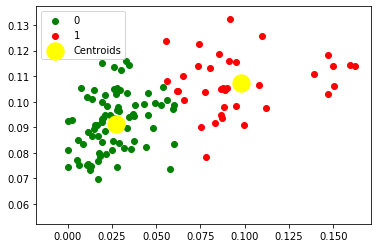

In [9]:
kmeans = KMeans(2, 'L1')
kmeans.fit(xTrain[["concave points_mean", "smoothness_mean"]].values, 'kmeans++')
labels = kmeans.predict(xTest[["concave points_mean", "smoothness_mean"]].values)

c1 = xTest[["concave points_mean", "smoothness_mean"]].values[labels==0]
c2 = xTest[["concave points_mean", "smoothness_mean"]].values[labels==1]
plt.scatter(c1[:, 0], c1[:,1], c='g', label='0')
plt.scatter(c2[:, 0], c2[:, 1], c='r', label='1')
plt.scatter(kmeans.cluster_centers[0,:],kmeans.cluster_centers[1,:],s=300,c='yellow',label='Centroids')
plt.legend()
plt.show()

## Cluster the dataset with kmeans, model and predict malignancy of tumors in the test set entries
## 1. Perform clustering using the following hyperparameter pairs
1. metric='L1', center_init='random'
2. metric='L1', center_init='kmeans++'
3. metric='L2', center_init='random'
4. metric='L2', center_init='kmeans++'

In [10]:
# metric='L1', center_init='random'
kmeans_l1_random = KMeans(2, 'L1')
kmeans_l1_random.fit(xTrain[["concave points_mean", "smoothness_mean"]].values, 'random')

# metric='L1', center_init='kmeans++'
kmeans_l1_kmeanspp = KMeans(2, 'L1')
kmeans_l1_kmeanspp.fit(xTrain[["concave points_mean", "smoothness_mean"]].values, 'kmeans++')

# metric='L2', center_init='random'
kmeans_l2_random = KMeans(2, 'L2')
kmeans_l2_random.fit(xTrain[["concave points_mean", "smoothness_mean"]].values, 'random')

# metric='L2', center_init='kmeans++'
kmeans_l2_kmeanspp = KMeans(2, 'L2')
kmeans_l2_kmeanspp.fit(xTrain[["concave points_mean", "smoothness_mean"]].values, 'kmeans++')

## 2. Predict malignancy of tumors in the test set entries using all 4 models trained above, compare their performances.

In [11]:
from sklearn.metrics import accuracy_score

labels1 = kmeans_l1_random.predict(xTest[["concave points_mean", "smoothness_mean"]].values)
print('kmeans_l1_random', accuracy_score(yTest, labels1))

labels2 = kmeans_l1_kmeanspp.predict(xTest[["concave points_mean", "smoothness_mean"]].values)
print('kmeans_l1_kmeanspp', accuracy_score(yTest, labels2))

labels3 = kmeans_l2_random.predict(xTest[["concave points_mean", "smoothness_mean"]].values)
print('kmeans_l2_random', accuracy_score(yTest, labels3))

labels4 = kmeans_l2_kmeanspp.predict(xTest[["concave points_mean", "smoothness_mean"]].values)
print('kmeans_l2_kmeanspp', accuracy_score(yTest, labels4))

kmeans_l1_random 0.12280701754385964
kmeans_l1_kmeanspp 0.8771929824561403
kmeans_l2_random 0.10526315789473684
kmeans_l2_kmeanspp 0.8947368421052632


## Fit your implementation of Logistic Regression on the dataset, predict on test set and compare the results with kmeans approach

In [25]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=1000):
        self.lr = lr
        self.num_iter = num_iter
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        intercept = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept, X), axis=1)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
    
    def predict_prob(self, X):
        intercept = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept, X), axis=1)
    
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [26]:
model = LogisticRegression(lr=0.1, num_iter=300000)
model.fit(xTrain[["concave points_mean", "smoothness_mean"]].values, yTrain)

In [31]:
preds = model.predict(xTest[["concave points_mean", "smoothness_mean"]].values, 0.5)
labels = preds.astype(int)



## Analyze the coefficients of fitted logistic regression model, drop 2 most unimportant features and train again Logistic regression and Kmeans with best metric, center_init hyperparameters, evaluate and compare results

## Analyze the coefficients of fitted initial logistic regression model(using all features), select two most important features and train again Logistic regression and Kmeans with best metric, center_init hyperparameters, evaluate and compare results, make the following plot using the test set:

datapoints with cluster centers and decision boundary, color the datapoints according to Kmeans predictions
color the datapoints on which predictions of logistic regression and Kmeans disagree with separate color


## Compare performance of best Kmeans model with the performance of Kmeans in sklearn library, using the same hyperparameters.